## SOFTMAX Regression Approach

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
img = mnist.train.images[1].reshape(28,28)

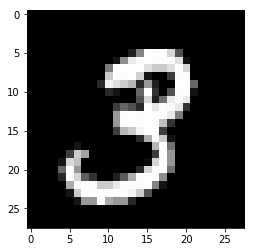

In [10]:
plt.imshow(img, cmap='gray')

In [12]:
img.max()

1.0

In [18]:
#Placeholders
x = tf.placeholder(tf.float32, shape=[None,784])

In [19]:
#Variables
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [20]:
#Create graph operators
y = tf.matmul(x,w) + b

In [21]:
#Loss function
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [28]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

In [29]:
#Optimizers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [30]:
train = optimizer.minimize(cross_entropy)

In [31]:
# Create session and run all
init = tf.global_variables_initializer()

In [45]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batchx, batchy = mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batchx,y_true:batchy})
    
    correct_pred = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.925


# CNN

In [4]:
# Helper funcs (which help to initialise the weights)

# Init weights
def init_weights(shape):
    init_rm_dist = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_rm_dist)

In [5]:
# init bias
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [6]:
# CONV2D
def conv2d(x,w):
    # x --> i/p; x.shape --> [batch,H,W,C]
    # w --> kernel/filter; w.shape --> [filter H, filter W, C in, C out]
    return tf.nn.conv2d(x,w,strides=[1,1,1,1], padding='SAME')

In [7]:
# Pooling
def max_pool(x):
    # x --> i/p
    return tf.nn.max_pool(x, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [8]:
# Layers
# conv layer
def conv_layer(inputx, shape):
    w = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(inputx,w)+b)

In [9]:
# Normal layer (fully connected)
def full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    w = init_weights([input_size,size])
    b = init_bias([size])
    return tf.matmul(input_layer,w)+b

In [10]:
# placeholders
x = tf.placeholder(tf.float32,shape=[None,784])
y_true=tf.placeholder(tf.float32,shape=[None,10])

In [11]:
# Layers
x_img = tf.reshape(x,[-1,28,28,1])

In [12]:
convo1 = conv_layer(x_img,shape=[5,5,1,32]) # 32 --> no. of features
convo1_pool = max_pool(convo1)

In [13]:
convo2 = conv_layer(convo1_pool,shape=[5,5,32,64])
convo2_pool = max_pool(convo2)

In [14]:
convo_2_flat = tf.reshape(convo2_pool,[-1,7*7*64])
full_layer1 = tf.nn.relu(full_layer(convo_2_flat,1024))

In [15]:
# Dropout
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer1,keep_prob=hold_prob)

In [16]:
y_pred = full_layer(full_one_dropout,10)

In [21]:
# loss fn
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y_pred))

In [22]:
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

In [23]:
init = tf.global_variables_initializer()

In [ ]:
steps = 1000

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(steps):
        batchx,batchy = mnist.train.next_batch(50)
        sess.run(train,feed_dict={x:batchx,y_true:batchy,hold_prob:0.5})
    
        if i%100==0:
            print(f"On step {i} Accuracy: ")
            match = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
            acc = tf.reduce_mean(tf.cast(match,tf.float32))
            print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels, hold_prob:1.0}))
            print('\n')

On step 0 Accuracy: 
